O valor p em condicoes de regularidade segue uma distribuicao uniforme.

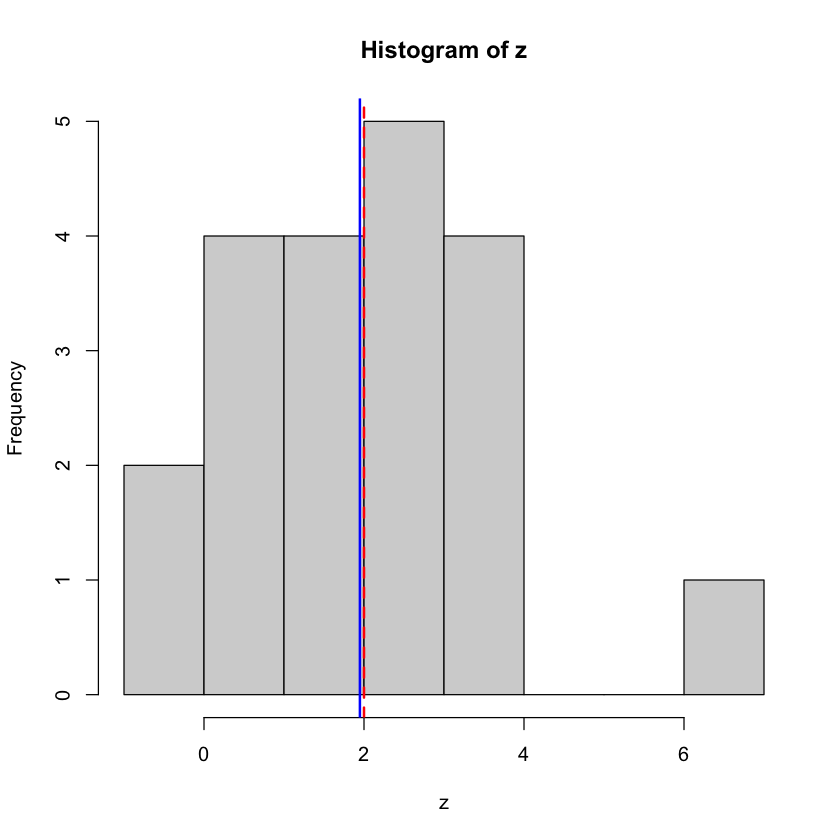

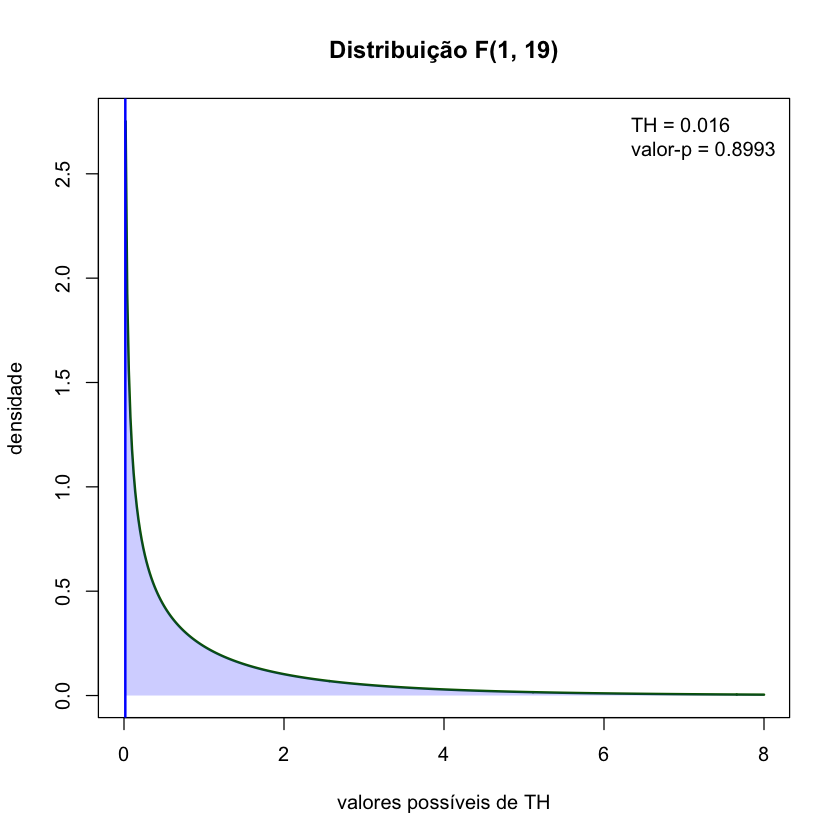

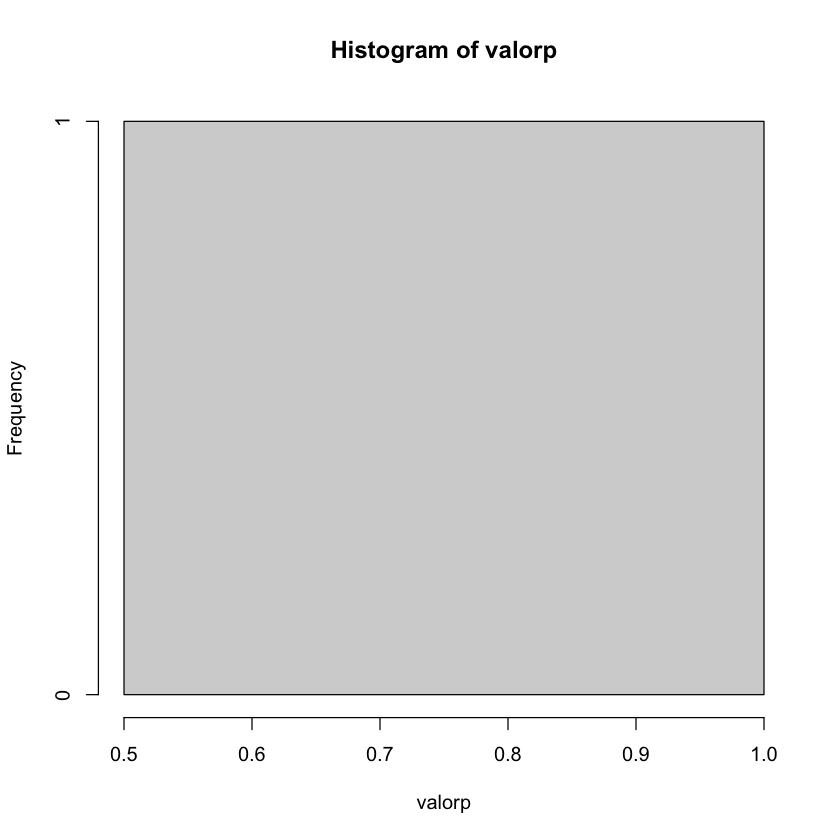

In [ ]:
n=20
sigma2=4
#sob H0
theta0=2
M=1
valorp = numeric()
for(i in 1:M) {
    z = rnorm(n, mean=theta0, sd = sqrt(sigma2))
    # Teste de Hipótese: quantas vezes a diferença observada é maior do que o erro padrão esperado. Desvio/incerteza da média.
    TH = n*(mean(z) - theta0)^2/var(z)
    valorp[i] = 1 - pf(TH, 1, n-1)

    if (i == 1) {

        hist(z)# adiciona delta para simular H1
        mean(z)
        abline(v = mean(z), col = "blue", lwd = 2)
        abline(v = theta0, col = "red", lwd = 2, lty = 2)

        # -----------------------------
        # Gráfico da distribuição F
        # -----------------------------
        x <- seq(0, 8, length.out = 400)
        y <- df(x, df1 = 1, df2 = n - 1)  # densidade da F(1, n-1)

        plot(x, y, type = "l", lwd = 2, col = "darkgreen",
            main = "Distribuição F(1, 19)",
            xlab = "valores possíveis de TH", ylab = "densidade")

        # marca o TH observado
        abline(v = TH, col = "blue", lwd = 2)

        # sombreia a área da cauda direita = valor-p
        area_x <- seq(TH, max(x), length.out = 200)
        polygon(c(area_x, rev(area_x)),
                c(df(area_x, 1, n - 1), rep(0, length(area_x))),
                col = rgb(0, 0, 1, 0.2), border = NA)

        valor_p <- 1 - pf(TH, 1, n - 1)
        legend("topright",
            legend = paste0("TH = ", round(TH,3),
                            "\nvalor-p = ", round(valor_p,4)),
            bty = "n")
    }
}
hist(valorp)

[1] 1.849415

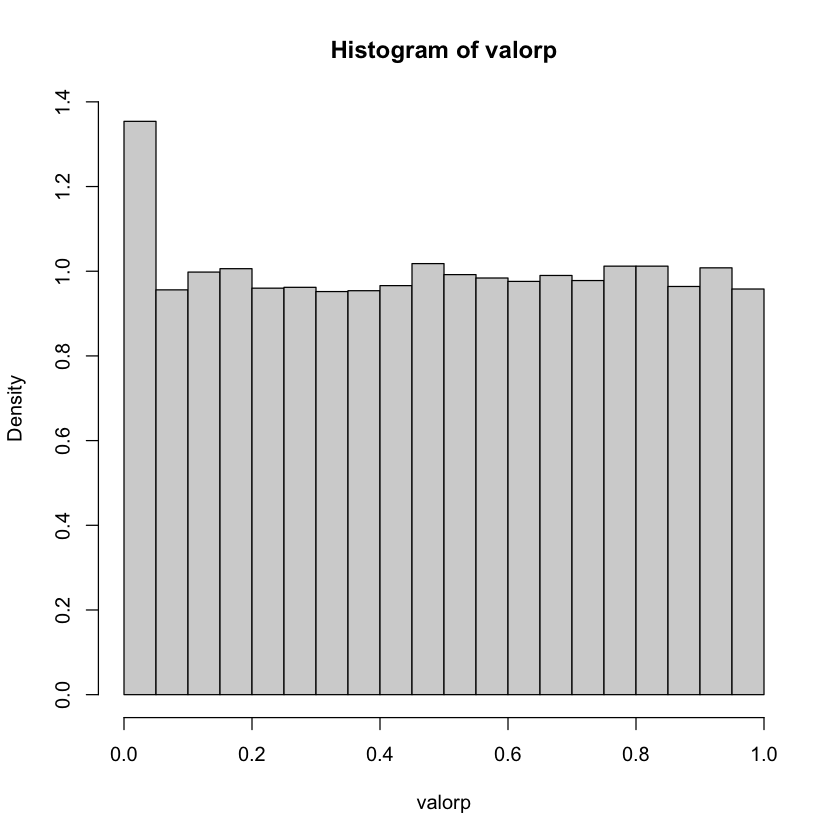

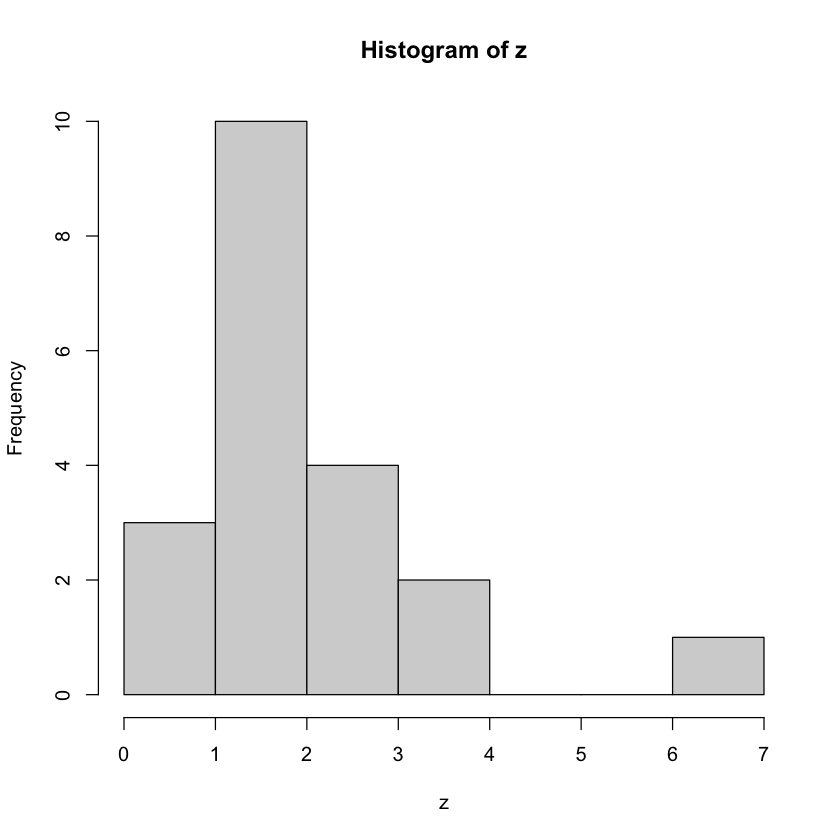

In [7]:
n=20
sigma2=4
delta=1
#sob H0
theta0=2
M=10000
valorp = numeric()
for(i in 1:M) {
    # z = rnorm(n, mean=theta0, sd = sqrt(sigma2))
    z = rgamma(n, shape = 2, rate = 1)
    TH = n*(mean(z) - theta0)^2/var(z)
    valorp[i] = 1 - pf(TH, 1, n-1)
}
hist(valorp, prob=TRUE)
mean(z)
hist(z)